In [1]:
import numpy as np
from collections import defaultdict
import h5py
import pickle
from matplotlib import pyplot as plt

In [2]:
import h5py
import numpy as np
import pickle

# File paths
gen_dataset_awgn = "/kaggle/input/custom-generated/RML25_AWGN"
gen_dataset_clean = "/kaggle/input/custom-generated/RML25_CLEAN"
gen_dataset_channel = "/kaggle/input/custom-generated/RML25_CHANNEL"


with open(gen_dataset_channel, "rb") as f:
    data_channel = pickle.load(f, encoding="latin1")

with open(gen_dataset_awgn, "rb") as f:
    data_awgn = pickle.load(f, encoding='latin1')
    print(data_awgn.keys())

with open(gen_dataset_clean, "rb") as f:
    data_clean = pickle.load(f, encoding='latin1')
    print(data_clean.keys())


dict_keys([('BPSK', 0), ('BPSK', 2), ('BPSK', 4), ('BPSK', 6), ('BPSK', 8), ('BPSK', 10), ('BPSK', 12), ('BPSK', 14), ('BPSK', 16), ('BPSK', 18), ('BPSK', 20), ('BPSK', 22), ('BPSK', 24), ('BPSK', 26), ('BPSK', 28), ('BPSK', 30), ('QPSK', 0), ('QPSK', 2), ('QPSK', 4), ('QPSK', 6), ('QPSK', 8), ('QPSK', 10), ('QPSK', 12), ('QPSK', 14), ('QPSK', 16), ('QPSK', 18), ('QPSK', 20), ('QPSK', 22), ('QPSK', 24), ('QPSK', 26), ('QPSK', 28), ('QPSK', 30), ('8PSK', 0), ('8PSK', 2), ('8PSK', 4), ('8PSK', 6), ('8PSK', 8), ('8PSK', 10), ('8PSK', 12), ('8PSK', 14), ('8PSK', 16), ('8PSK', 18), ('8PSK', 20), ('8PSK', 22), ('8PSK', 24), ('8PSK', 26), ('8PSK', 28), ('8PSK', 30), ('QAM16', 0), ('QAM16', 2), ('QAM16', 4), ('QAM16', 6), ('QAM16', 8), ('QAM16', 10), ('QAM16', 12), ('QAM16', 14), ('QAM16', 16), ('QAM16', 18), ('QAM16', 20), ('QAM16', 22), ('QAM16', 24), ('QAM16', 26), ('QAM16', 28), ('QAM16', 30), ('QAM64', 0), ('QAM64', 2), ('QAM64', 4), ('QAM64', 6), ('QAM64', 8), ('QAM64', 10), ('QAM64', 12

dict_keys([('BPSK', 0), ('BPSK', 2), ('BPSK', 4), ('BPSK', 6), ('BPSK', 8), ('BPSK', 10), ('BPSK', 12), ('BPSK', 14), ('BPSK', 16), ('BPSK', 18), ('BPSK', 20), ('BPSK', 22), ('BPSK', 24), ('BPSK', 26), ('BPSK', 28), ('BPSK', 30), ('QPSK', 0), ('QPSK', 2), ('QPSK', 4), ('QPSK', 6), ('QPSK', 8), ('QPSK', 10), ('QPSK', 12), ('QPSK', 14), ('QPSK', 16), ('QPSK', 18), ('QPSK', 20), ('QPSK', 22), ('QPSK', 24), ('QPSK', 26), ('QPSK', 28), ('QPSK', 30), ('8PSK', 0), ('8PSK', 2), ('8PSK', 4), ('8PSK', 6), ('8PSK', 8), ('8PSK', 10), ('8PSK', 12), ('8PSK', 14), ('8PSK', 16), ('8PSK', 18), ('8PSK', 20), ('8PSK', 22), ('8PSK', 24), ('8PSK', 26), ('8PSK', 28), ('8PSK', 30), ('QAM16', 0), ('QAM16', 2), ('QAM16', 4), ('QAM16', 6), ('QAM16', 8), ('QAM16', 10), ('QAM16', 12), ('QAM16', 14), ('QAM16', 16), ('QAM16', 18), ('QAM16', 20), ('QAM16', 22), ('QAM16', 24), ('QAM16', 26), ('QAM16', 28), ('QAM16', 30), ('QAM64', 0), ('QAM64', 2), ('QAM64', 4), ('QAM64', 6), ('QAM64', 8), ('QAM64', 10), ('QAM64', 12

In [3]:
import numpy as np
for modulation, snr in list(data_clean.keys()):
    new_key = (modulation, 9999)
    
    # If the new key already exists, append the values; otherwise, create it
    if new_key in data_clean:
        data_clean[new_key] = np.concatenate((data_clean[new_key], data_clean.pop((modulation, snr))), axis=0)
    else:
        data_clean[new_key] = data_clean.pop((modulation, snr))

In [4]:
for key, values in data_channel.items():
    data_channel[key] = np.transpose(np.array(values), (0, 2, 1))
    
for key, values in data_awgn.items():
    data_awgn[key] = np.transpose(np.array(values), (0, 2, 1))

for key, values in data_clean.items():
    data_clean[key] = np.transpose(np.array(values), (0, 2, 1))

In [5]:
print(data_clean['BPSK', 9999].shape)

(24000, 1024, 2)


In [6]:
for key, value in data_awgn.items():
    if key in data_channel:
        # Merge values if the key exists in both dictionaries
        data_channel[key] = np.concatenate((data_channel[key], value), axis=0)
    else:
        # Add the key-value pair if it doesn't exist
        data_channel[key] = value
print(data_channel['BPSK', 0].shape)

(5096, 1024, 2)


In [7]:
data_clean_new = {}

for key, value in data_clean.items():
    data_clean_new[key] = value[:5096]

In [8]:
print(data_clean_new['BPSK', 9999].shape)

(5096, 1024, 2)


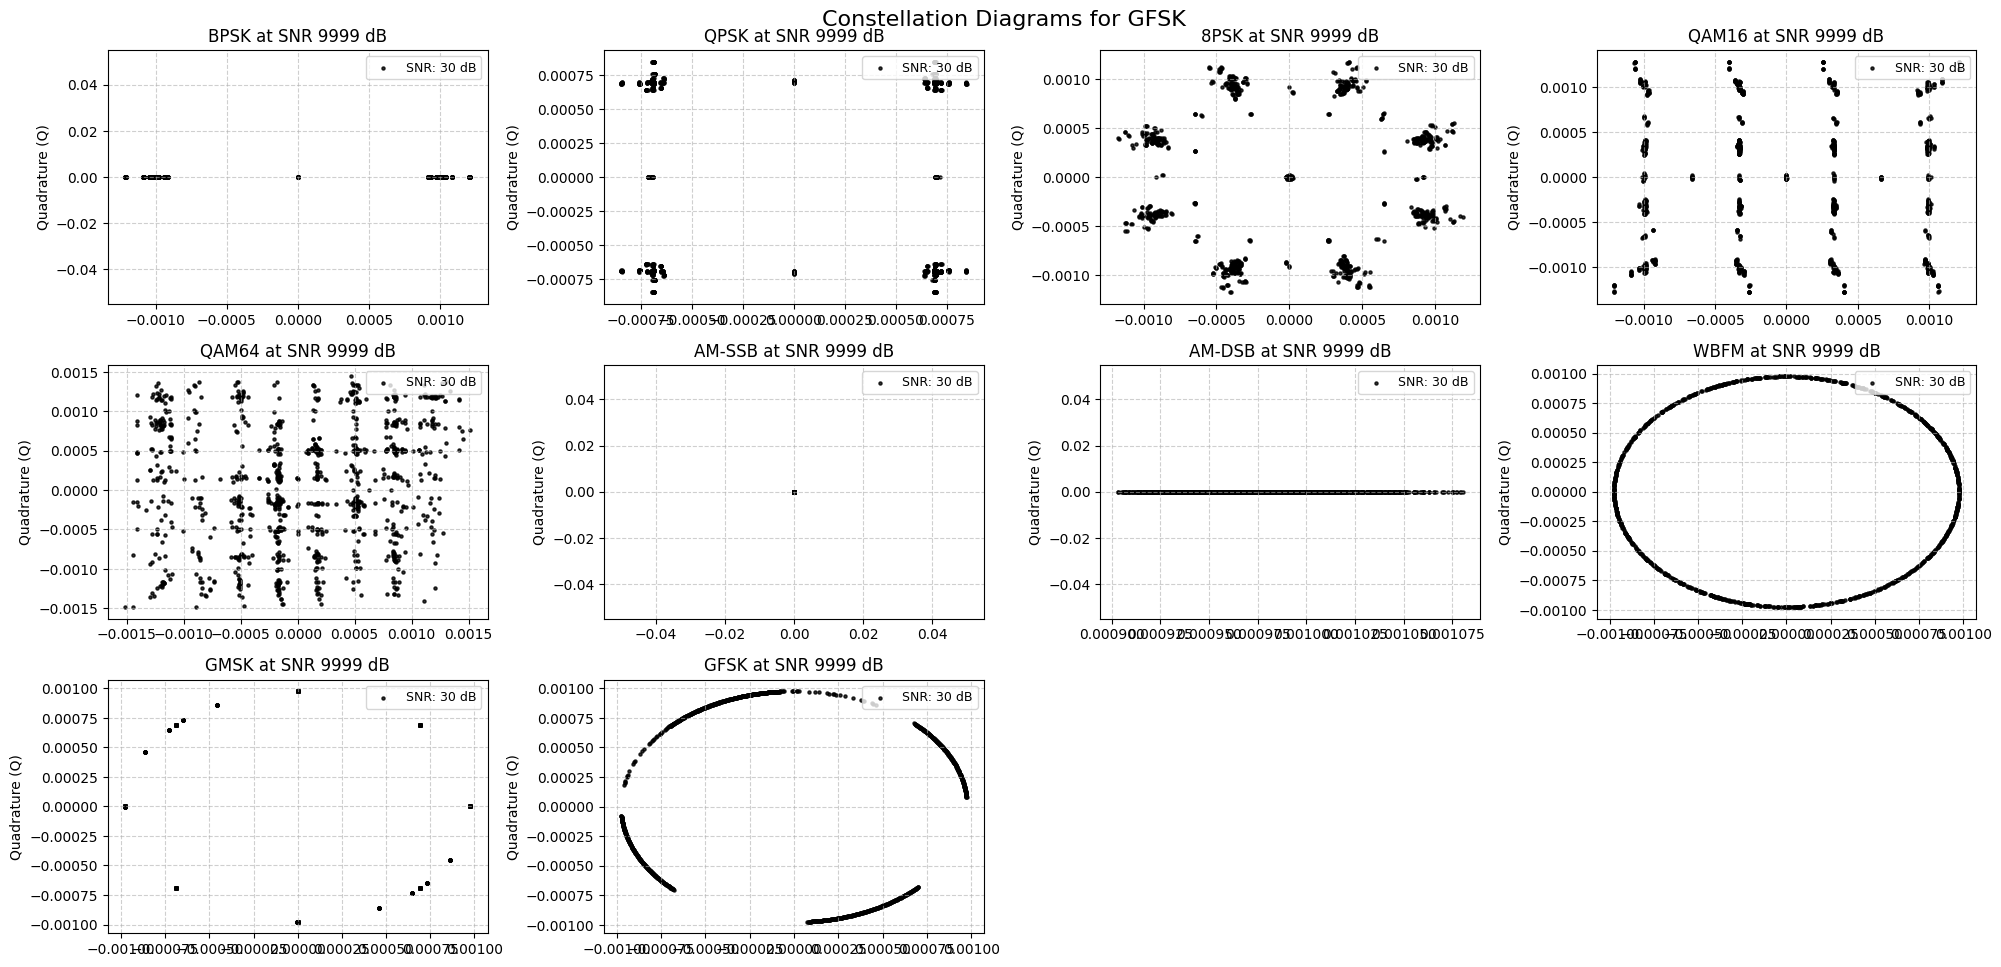

In [9]:
############################## PLOTTING TO CHECK THE CLEAN DATA #############################
#############################################################################################
############################## PLOTTING TO CHECK THE ORIGINAL DATA #############################
#############################################################################################
from matplotlib import pyplot as plt

def plot_constellation(modulation_classes, snr_value, data):
    plt.figure(figsize=(20, 16))
    for i, modulation_class in enumerate(modulation_classes):
        key = (modulation_class, snr_value)
        if key in data:
            values = data[key]
            # print(values.shape)
            # break
            I_values = values[:1, :, 0].flatten()  # for one instance change the x index
            Q_values = values[:1, :, 1].flatten()

            ax = plt.subplot(5, 4, i + 1)
            ax.scatter(I_values, Q_values, s=5, alpha=0.8, color='black', label=f'SNR: {snr} dB')
            ax.set_title(f"{modulation_class} at SNR {snr_value} dB", fontsize=12)
            ax.set_ylabel("Quadrature (Q)", fontsize=10)
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.legend(fontsize=9, loc='upper right')
        else:
            print(f"Key {key} not found in data.")

    plt.suptitle(f"Constellation Diagrams for {modulation_class}", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.tight_layout()
    plt.show()


mod_class = ['BPSK', 'QPSK', '8PSK', 'QAM16', 'QAM64', 'AM-SSB', 'AM-DSB', 'WBFM', 'GMSK', 'GFSK']
snr_values = 9999
plot_constellation(mod_class, snr_values, data_clean_new)

In [10]:
for key, value in data_clean_new.items():
    if key in data_channel:
        # Merge values if the key exists in both dictionaries
        data_channel[key] = np.concatenate((data_channel[key], value), axis=0)
    else:
        # Add the key-value pair if it doesn't exist
        data_channel[key] = value
print(data_channel.keys())

dict_keys([('BPSK', 0), ('BPSK', 2), ('BPSK', 4), ('BPSK', 6), ('BPSK', 8), ('BPSK', 10), ('BPSK', 12), ('BPSK', 14), ('BPSK', 16), ('BPSK', 18), ('BPSK', 20), ('BPSK', 22), ('BPSK', 24), ('BPSK', 26), ('BPSK', 28), ('BPSK', 30), ('QPSK', 0), ('QPSK', 2), ('QPSK', 4), ('QPSK', 6), ('QPSK', 8), ('QPSK', 10), ('QPSK', 12), ('QPSK', 14), ('QPSK', 16), ('QPSK', 18), ('QPSK', 20), ('QPSK', 22), ('QPSK', 24), ('QPSK', 26), ('QPSK', 28), ('QPSK', 30), ('8PSK', 0), ('8PSK', 2), ('8PSK', 4), ('8PSK', 6), ('8PSK', 8), ('8PSK', 10), ('8PSK', 12), ('8PSK', 14), ('8PSK', 16), ('8PSK', 18), ('8PSK', 20), ('8PSK', 22), ('8PSK', 24), ('8PSK', 26), ('8PSK', 28), ('8PSK', 30), ('QAM16', 0), ('QAM16', 2), ('QAM16', 4), ('QAM16', 6), ('QAM16', 8), ('QAM16', 10), ('QAM16', 12), ('QAM16', 14), ('QAM16', 16), ('QAM16', 18), ('QAM16', 20), ('QAM16', 22), ('QAM16', 24), ('QAM16', 26), ('QAM16', 28), ('QAM16', 30), ('QAM64', 0), ('QAM64', 2), ('QAM64', 4), ('QAM64', 6), ('QAM64', 8), ('QAM64', 10), ('QAM64', 12

In [11]:
for modulation, snr in list(data_channel.keys()):
    if modulation == "QAM16":
        data_channel[("16QAM", snr)] = data_channel.pop((modulation, snr))
    elif modulation == "QAM64":
        data_channel[("64QAM", snr)] = data_channel.pop((modulation, snr))
    elif modulation == "WBFM":
        data_channel[("FM", snr)] = data_channel.pop((modulation, snr))
    elif modulation == "AM-SSB":
        data_channel[("AM-SSB-SC", snr)] = data_channel.pop((modulation, snr))
    elif modulation == "AM-DSB":
        data_channel[("AM-DSB-SC", snr)] = data_channel.pop((modulation, snr))


In [12]:
print(data_channel.keys())

dict_keys([('BPSK', 0), ('BPSK', 2), ('BPSK', 4), ('BPSK', 6), ('BPSK', 8), ('BPSK', 10), ('BPSK', 12), ('BPSK', 14), ('BPSK', 16), ('BPSK', 18), ('BPSK', 20), ('BPSK', 22), ('BPSK', 24), ('BPSK', 26), ('BPSK', 28), ('BPSK', 30), ('QPSK', 0), ('QPSK', 2), ('QPSK', 4), ('QPSK', 6), ('QPSK', 8), ('QPSK', 10), ('QPSK', 12), ('QPSK', 14), ('QPSK', 16), ('QPSK', 18), ('QPSK', 20), ('QPSK', 22), ('QPSK', 24), ('QPSK', 26), ('QPSK', 28), ('QPSK', 30), ('8PSK', 0), ('8PSK', 2), ('8PSK', 4), ('8PSK', 6), ('8PSK', 8), ('8PSK', 10), ('8PSK', 12), ('8PSK', 14), ('8PSK', 16), ('8PSK', 18), ('8PSK', 20), ('8PSK', 22), ('8PSK', 24), ('8PSK', 26), ('8PSK', 28), ('8PSK', 30), ('GFSK', 0), ('GFSK', 2), ('GFSK', 4), ('GFSK', 6), ('GFSK', 8), ('GFSK', 10), ('GFSK', 12), ('GFSK', 14), ('GFSK', 16), ('GFSK', 18), ('GFSK', 20), ('GFSK', 22), ('GFSK', 24), ('GFSK', 26), ('GFSK', 28), ('GFSK', 30), ('GMSK', 0), ('GMSK', 2), ('GMSK', 4), ('GMSK', 6), ('GMSK', 8), ('GMSK', 10), ('GMSK', 12), ('GMSK', 14), ('GMSK

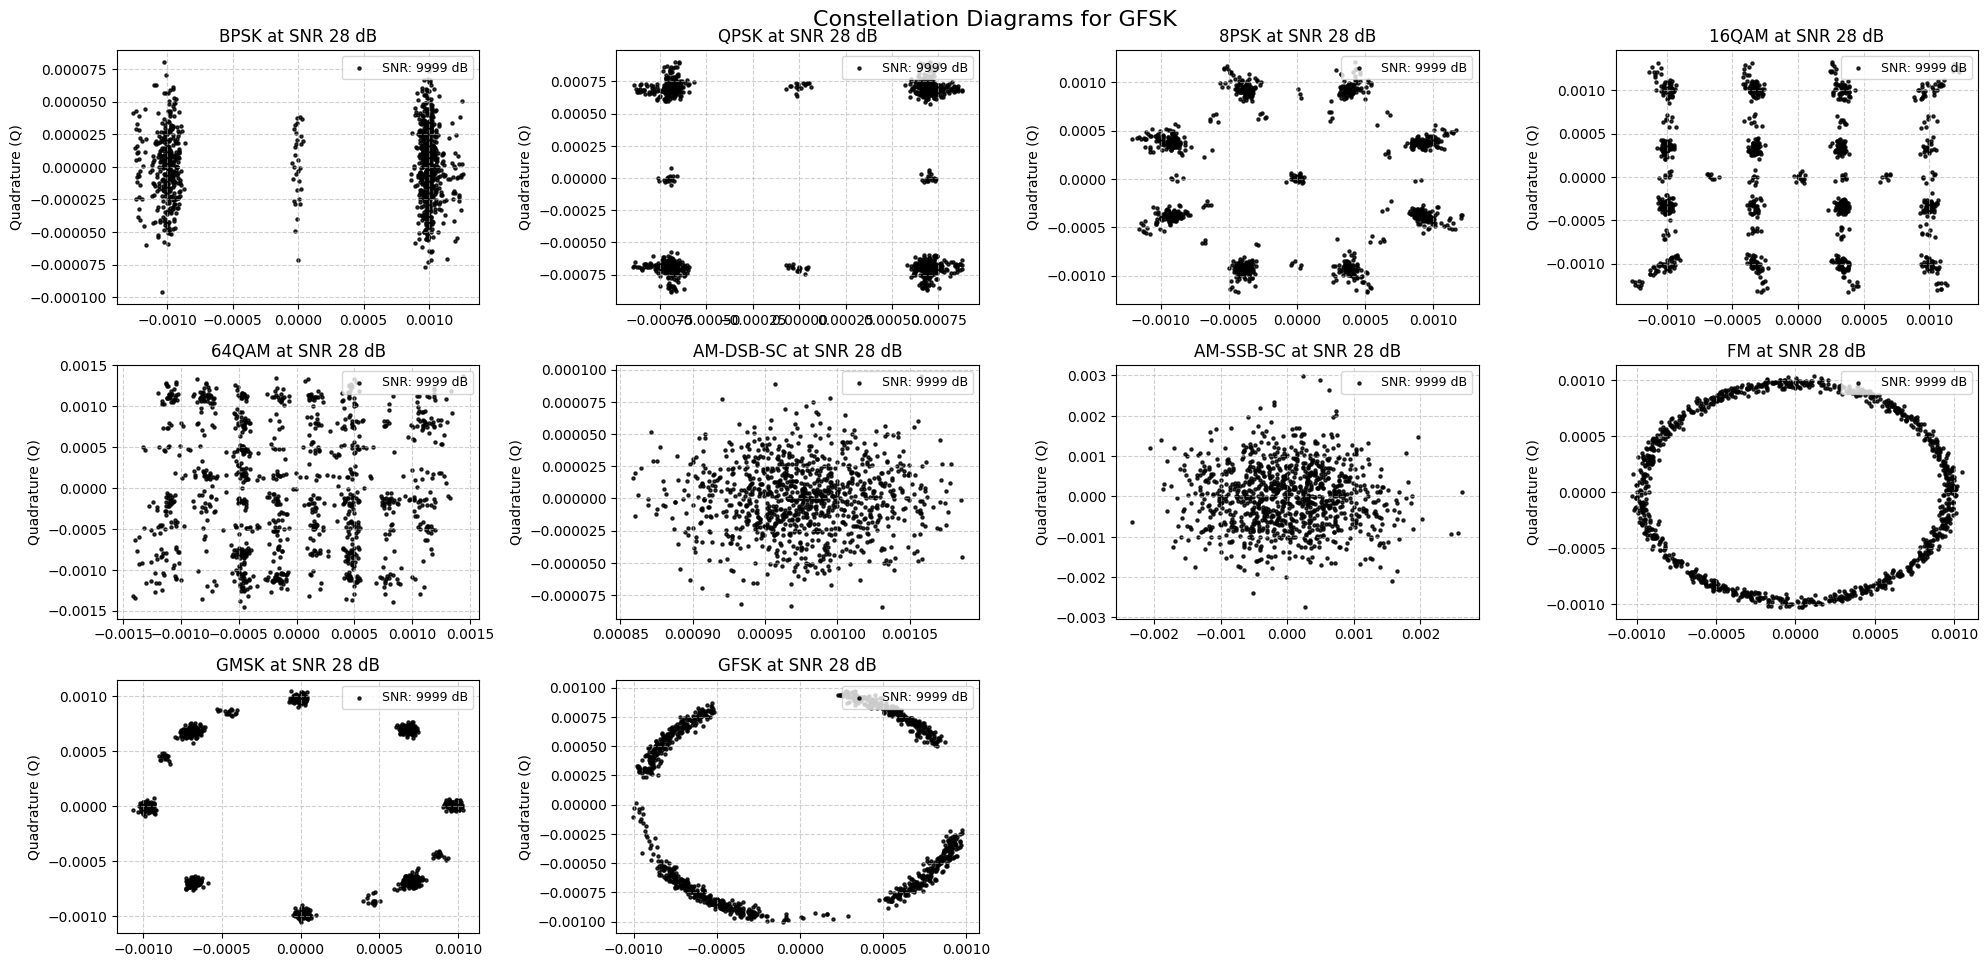

In [13]:
############################## PLOTTING TO CHECK THE COMBINED DATA #############################
#############################################################################################
############################## PLOTTING TO CHECK THE DATA #############################
#############################################################################################
from matplotlib import pyplot as plt

def plot_constellation(modulation_classes, snr_value, data):
    plt.figure(figsize=(20, 16))
    for i, modulation_class in enumerate(modulation_classes):
        key = (modulation_class, snr_value)
        if key in data:
            values = data[key]
            # print(values.shape)
            # break
            I_values = values[5000, :, 0].flatten()  # for one instance change the x index
            Q_values = values[5000, :, 1].flatten()

            ax = plt.subplot(5, 4, i + 1)
            ax.scatter(I_values, Q_values, s=5, alpha=0.8, color='black', label=f'SNR: {snr} dB')
            ax.set_title(f"{modulation_class} at SNR {snr_value} dB", fontsize=12)
            ax.set_ylabel("Quadrature (Q)", fontsize=10)
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.legend(fontsize=9, loc='upper right')
        else:
            print(f"Key {key} not found in data.")

    plt.suptitle(f"Constellation Diagrams for {modulation_class}", fontsize=16)
    plt.subplots_adjust(top=0.95)
    plt.tight_layout()
    plt.show()


mod_class = ['BPSK', 'QPSK', '8PSK', '16QAM', '64QAM', 'AM-DSB-SC', 'AM-SSB-SC', 'FM', 'GMSK', 'GFSK']
snr_values = 28
plot_constellation(mod_class, snr_values, data_channel)

In [14]:
final_dataset = "/kaggle/working/RML25_COMBINED"

In [15]:
import pickle

with open(final_dataset, "wb") as f:  # Open file in binary write mode
    pickle.dump(data_channel, f, protocol=pickle.HIGHEST_PROTOCOL)  # Dump the data

# # To verify the contents after saving
# with open(final_dataset, "rb") as f:
#     data_channel_new = pickle.load(f, encoding='latin1')  # Load the data
#     print(data_channel_new.keys())  # Print keys of the loaded dictionary

In [16]:
!ls /kaggle/working/

RML25_COMBINED	__notebook__.ipynb


In [17]:
print(data_channel['BPSK', 9999].shape)

(5096, 1024, 2)


In [18]:
combined_dataset_path = "GOLD_XYZ_OSC_POSITIVE_COMBINED.hdf5"

In [19]:
orig_mapped_classes_index = {
    'BPSK': 0,
    'QPSK': 1,
    '8PSK': 2,
    '16QAM': 3,
    '64QAM': 4,    
    'AM-DSB-SC': 5,
    'AM-SSB-SC': 6,
    'FM': 7,
    'GMSK': 8,
    'GFSK': 9
}

X_list = []
Y_list = []
Z_list = []

for modulation, snr in data_channel.keys():
    mapped_class = orig_mapped_classes_index[modulation]
    data = data_channel[(modulation, snr)]
    X_list.append(data)
    Y_list.append(np.full(data.shape[0], mapped_class))
    Z_list.append(np.full(data.shape[0], snr))

X_total = np.concatenate(X_list, axis=0)
Y_total = np.concatenate(Y_list, axis=0)
Z_total = np.concatenate(Z_list, axis=0)

with h5py.File(combined_dataset_path, 'w') as output_file:
    output_file.create_dataset('X', data=X_total, compression='gzip')
    output_file.create_dataset('Y', data=Y_total, compression='gzip')
    output_file.create_dataset('Z', data=Z_total, compression='gzip')

In [20]:
import h5py
total_dataset_path = "/kaggle/working/GOLD_XYZ_OSC_POSITIVE_COMBINED.hdf5"

with h5py.File(total_dataset_path, 'r') as file:
        X = file['X'][:]  # IQ samples
        Y = file['Y'][:]  # Class indices (already mapped to contiguous indices)
        Z = file['Z'][:]  # SNR values